# Report

This report shows the results of a several day web scraping process. The production of renewable energy (solar and wind) along with weather information (global UV radiation and wind speed).

Check the datasets of the HDF5 file "api_results.h5":

In [1]:
import pandas as pd

filename = 'api_results.h5'
with pd.HDFStore(filename, 'r') as store:
    data_dict = {}
    for key in store.keys():
        data_dict[key] = store[key]

data_dict

{'/day20250319/dwd':                     timestamp  value   unit             variable
 0   2025-03-19 02:40:00+00:00    0.0  J/cm²  Global UV Radiation
 1   2025-03-19 03:00:00+00:00    0.0  J/cm²  Global UV Radiation
 2   2025-03-19 11:50:00+00:00   38.1  J/cm²  Global UV Radiation
 3   2025-03-19 13:20:00+00:00   33.4  J/cm²  Global UV Radiation
 4   2025-03-19 01:50:00+00:00    0.0  J/cm²  Global UV Radiation
 ..                        ...    ...    ...                  ...
 140 2025-03-19 14:30:00+00:00   25.6  J/cm²  Global UV Radiation
 141 2025-03-19 15:00:00+00:00   21.3  J/cm²  Global UV Radiation
 142 2025-03-19 19:30:00+00:00    0.0  J/cm²  Global UV Radiation
 143 2025-03-19 20:40:00+00:00    0.0  J/cm²  Global UV Radiation
 144 2025-03-19 23:10:00+00:00    0.0  J/cm²  Global UV Radiation
 
 [145 rows x 4 columns],
 '/day20250319/entsoe':                     timestamp      variable   value unit
 0   2025-03-19 01:00:00+01:00         Solar     0.0   MW
 1   2025-03-19 01:15:

Concatenate the datasets inside the dictionary to one long format dataset. 

In [2]:
combined_df = pd.concat(data_dict.values(), keys = data_dict.keys())
combined_df.head()

timestamp  value   unit  \
/day20250319/dwd 0  2025-03-19 02:40:00+00:00    0.0  J/cm²   
                 1  2025-03-19 03:00:00+00:00    0.0  J/cm²   
                 2  2025-03-19 11:50:00+00:00   38.1  J/cm²   
                 3  2025-03-19 13:20:00+00:00   33.4  J/cm²   
                 4  2025-03-19 01:50:00+00:00    0.0  J/cm²   

                               variable  
/day20250319/dwd 0  Global UV Radiation  
                 1  Global UV Radiation  
                 2  Global UV Radiation  
                 3  Global UV Radiation  
                 4  Global UV Radiation

Transform the column timestamp to datetime format.  Check if each column contains correct values by using describe(). 

In [3]:
combined_df["timestamp"] = pd.to_datetime(combined_df["timestamp"], utc = True)
combined_df.describe(include = 'all')


,timestamp,value,unit,variable
count,1828,1828.000000,1828,1828
unique,NaN,NaN,3,5
top,NaN,NaN,MW,Global UV Radiation
freq,NaN,NaN,1152,580
mean,2025-03-17 23:53:41.881837824+00:00,4410.956832,NaN,NaN
min,2025-03-16 00:00:00+00:00,0.000000,NaN,NaN
25%,2025-03-17 00:00:00+00:00,0.100000,NaN,NaN
50%,2025-03-18 00:00:00+00:00,575.000000,NaN,NaN
75%,2025-03-19 00:00:00+00:00,5924.000000,NaN,NaN
max,2025-03-20 00:00:00+00:00,43667.000000,NaN,NaN


Descriptive statistics for each "variable" showing count, mean, std, min,	25%, 50%, 75% and max of the column "value".

In [8]:
combined_df.groupby("variable")["value"].describe(include = 'all')


,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
Global UV Radiation,580.0,9.684655,13.186103,0.000000,0.00000,0.200000,18.225000,38.300000
Solar,384.0,10958.330729,14584.706122,0.000000,0.00000,169.500000,23910.500000,43667.000000
Wind Offshore,384.0,1857.315104,1516.442219,388.000000,825.50000,1279.500000,2479.500000,6059.000000
Wind Onshore,384.0,8164.635417,3621.721620,906.000000,6116.25000,8411.000000,9972.250000,16287.000000
Windspeed 10 m,96.0,12.333209,7.554888,0.804985,6.27149,11.226468,16.795069,30.385365


Show the statsitical values using a box plot.

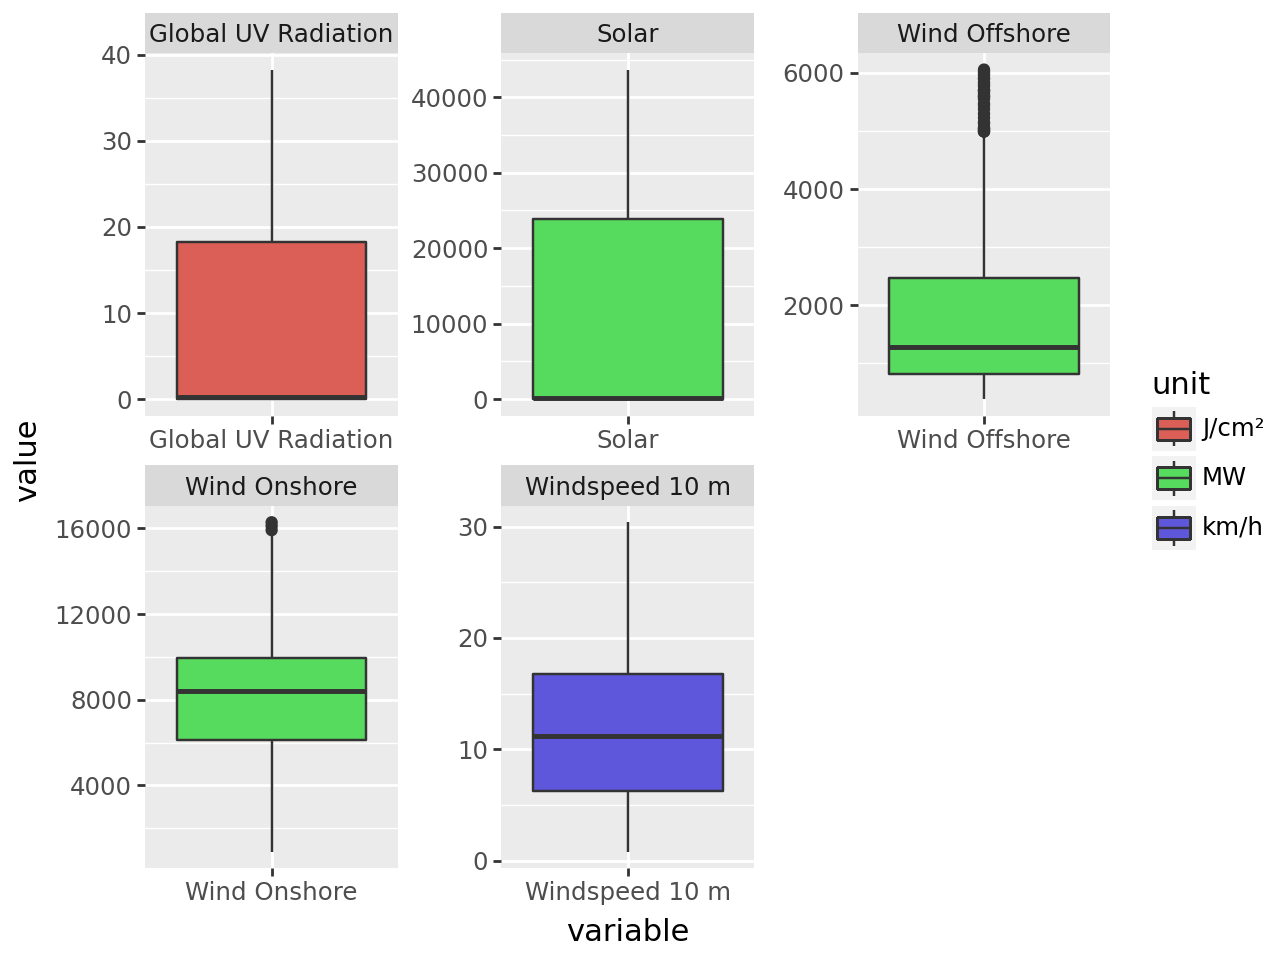

In [5]:
import pandas as pd
from plotnine import (
    ggplot,
    aes,
    geom_boxplot,
    geom_line,
    facet_wrap,
    labs,
    scale_x_datetime,
    element_text,
    theme
)



boxplot = (
    ggplot(combined_df, aes(x='variable', y='value', fill='unit'))
 + geom_boxplot()
 + facet_wrap("variable", scales="free")
)
boxplot 



Show the timeline of each variable using a line plot.

/home/annaz/anaconda3/lib/python3.12/site-packages/mizani/breaks.py:448: FutureWarning: Passing the width as the parameter has been deprecated and will not work in a future version. Use breaks_date(width="4 years")


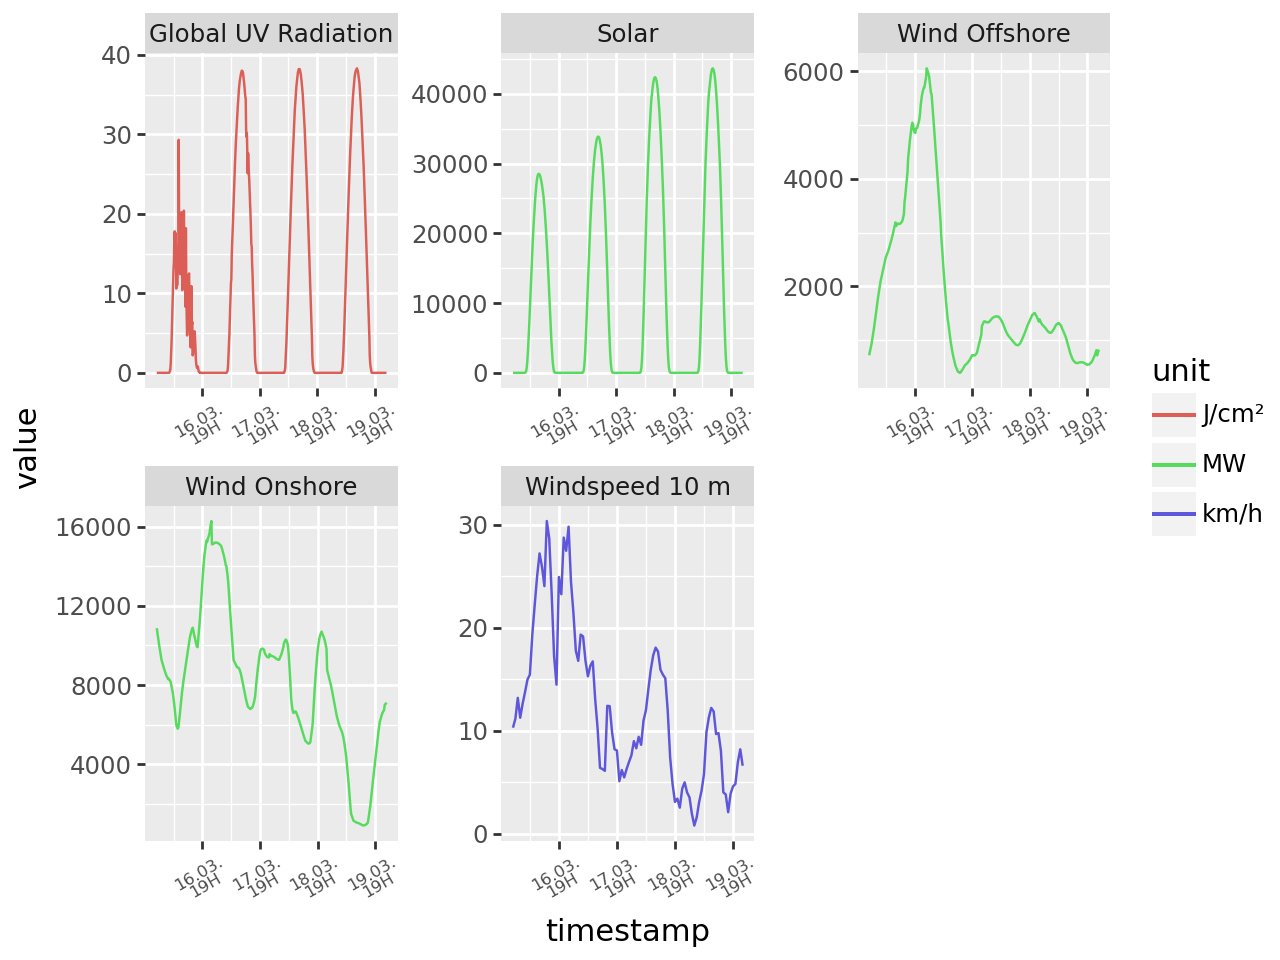

In [6]:

p1 = (
ggplot(combined_df, aes(x="timestamp", y="value", color="unit"))
+ geom_line()
+ scale_x_datetime(date_breaks="24 hours", date_labels="%d.%m.\n%HH")
+ facet_wrap("variable", scales="free")
)
p1 + theme(axis_text_x=element_text(angle=30, size=6))  
